In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import ipywidgets
from IPython.display import display
import seaborn as sns

In [ ]:
nba_actions = pd.read_csv('/content/nba_pbp_data_full_w_shot_locations (1).csv')
def court (ax:mpl.axes, color = "black"):
  #Create a basketball half court#

  #Short corner 3PT Lines#
  ax.plot([-220, -220], [0,140], linewidth = 2, color = color)
  ax.plot([220, 220], [0,140], linewidth = 2, color = color)

  #3PT Arc#
  ax.add_artist(mpl.patches.Arc((0,140), 440, 315, theta1=0,theta2=180, facecolor='none',edgecolor=color,lw=2))

  #Lane and Key#
  ax.plot([-80,-80],[0,190],linewidth = 2, color=color)
  ax.plot([80,80],[0,190],linewidth = 2, color=color)
  ax.plot([-60,-60],[0,190],linewidth = 2, color=color)
  ax.plot([60,60],[0,190],linewidth = 2, color=color)
  ax.plot([-80,80],[190,190],linewidth = 2, color=color)
  ax.add_artist(mpl.patches.Circle((0,60), 15, facecolor = 'none', edgecolor = color, lw=2))
  ax.plot([-250,250],[0,0],linewidth = 4, color='black')

  #Rim#
  ax.add_artist(mpl.patches.Circle((0,60),15, facecolor='none',edgecolor=color,lw=2))

  #Backboard#
  ax.plot([-36,36],[40,40],linewidth=2, color = color)

  #Remove ticks#
  ax.set_xticks([])
  ax.set_yticks([])

  #Set axis limits#
  ax.set_xlim(-250,250)
  ax.set_ylim(0,470)

  #Center Circle - Half
  ax.add_artist(mpl.patches.Circle((0,470),60, facecolor = 'none',  edgecolor= color, lw=2 ))
  ax.add_artist(mpl.patches.Circle((0,470),20, facecolor = 'none',  edgecolor= color, lw=2 ))

  # Box Semi Circle
  ax.add_artist(mpl.patches.Arc((0,190),120,120, theta1=0, theta2=180, facecolor = 'none',  edgecolor= color, lw=2 ))
  ax.add_artist(mpl.patches.Arc((0,190),120,120, theta1=180, theta2=360, facecolor = 'none',  edgecolor= color, lw=2 , linestyle ='--'))

  #Center Line

  ax.plot([-250, 250], [470, 470], linewidth = 2, color=color)

  return ax


In [ ]:
# Filter made shots from the dataset
made_shots = nba_actions[nba_actions['EVENT_DESC'] == 'Field Goal Made']

# Calculate the number of shots made in each zone
zone_counts = made_shots.groupby(['X_SHOT_COORDINATE', 'Y_SHOT_COORDINATE']).size().reset_index(name='MADE_SHOTS')

# Calculate the total number of shots attempted in each zone
total_shots = nba_actions.groupby(['X_SHOT_COORDINATE', 'Y_SHOT_COORDINATE']).size().reset_index(name='TOTAL_SHOTS')

# Merge the two dataframes to calculate the success rate for each zone
zone_success_rate = zone_counts.merge(total_shots, on=['X_SHOT_COORDINATE', 'Y_SHOT_COORDINATE'], how='left')
zone_success_rate['SUCCESS_RATE'] = zone_success_rate['MADE_SHOTS'] / zone_success_rate['TOTAL_SHOTS']

# Fill any NaN values in SUCCESS_RATE with 0 (if there are no shots attempted in that zone)
zone_success_rate['SUCCESS_RATE'].fillna(0, inplace=True)

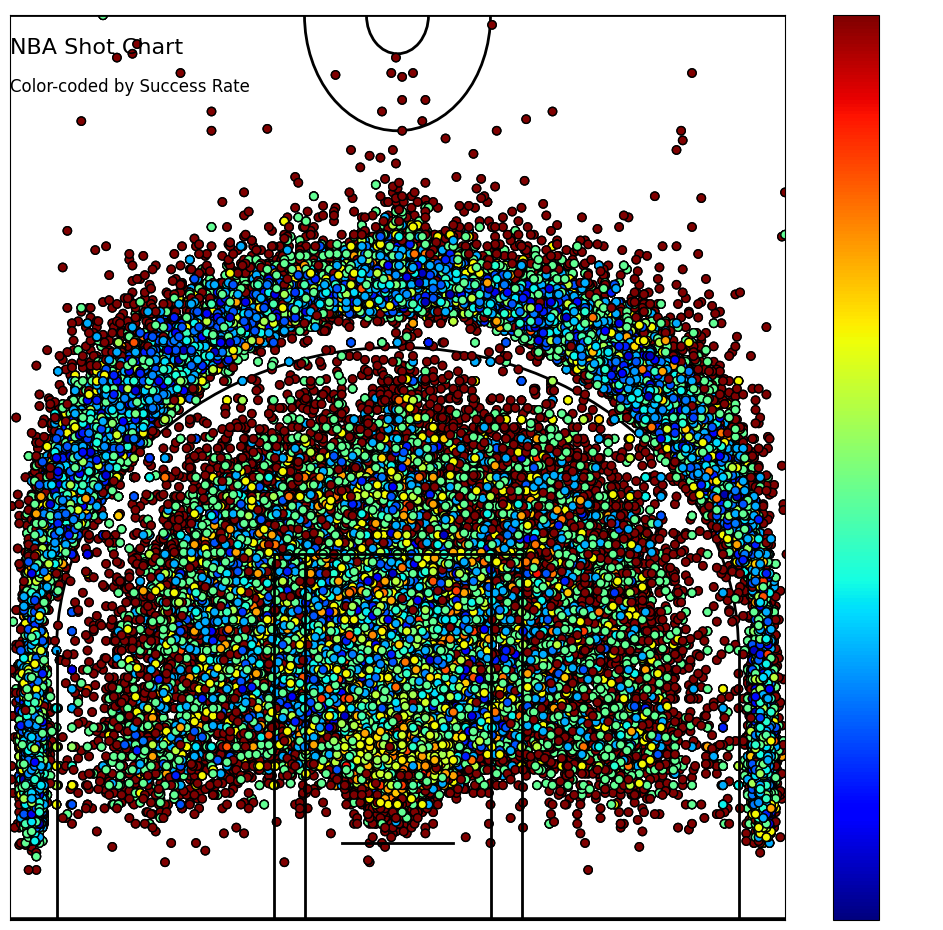

In [ ]:
nba_actions_with_success_rate = nba_actions.merge(zone_success_rate, on=['X_SHOT_COORDINATE', 'Y_SHOT_COORDINATE'], how ='left')
# Create the basketball court plot
fig, ax = plt.subplots(figsize=(12.5, 11.75))
court(ax)

# Scatter the shots on the court
sc = ax.scatter(nba_actions_with_success_rate['X_SHOT_COORDINATE']*10, nba_actions_with_success_rate['Y_SHOT_COORDINATE']*10 + 60, c = nba_actions_with_success_rate['SUCCESS_RATE'], cmap='jet', edgecolor='black')

# Add colorbar to represent the success rate
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Success Rate', fontsize=12, color='white')
cbar.ax.yaxis.set_tick_params(color='white')
cbar.ax.yaxis.set_tick_params(color='white', labelcolor='white')

# Set the court boundaries
ax.set_xlim(-250, 250)
ax.set_ylim(0, 470)

name = 'NBA'
# Add title and labels
plt.text(-250, 450, f"{name} Shot Chart", fontsize=16, color='black')
plt.text(-250, 430, "Color-coded by Success Rate", fontsize=12, color='black')

# Show the plot
plt.show()

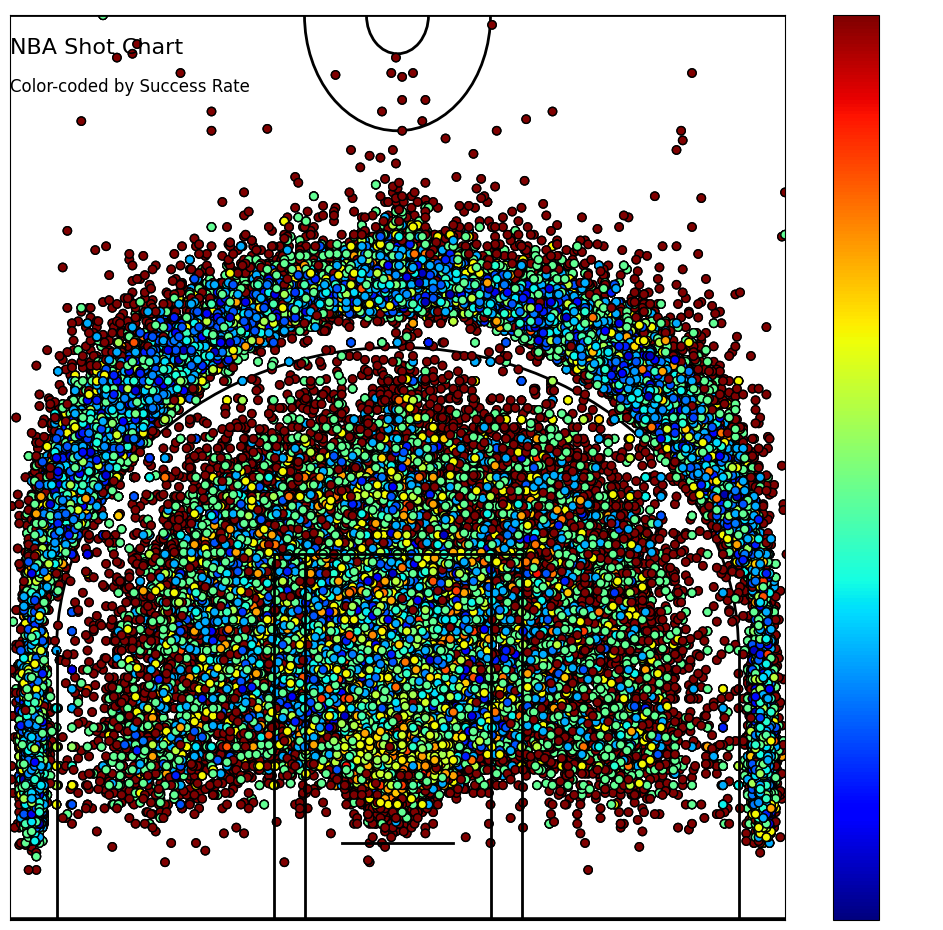

In [ ]:
hexbin = ax.hexbin(nba_actions_with_success_rate['X_SHOT_COORDINATE']*10, nba_actions_with_success_rate['Y_SHOT_COORDINATE']*10 + 60, cmap= 'hot', bins="log", gridsize=25, mincnt=2, extent=(-250, 250, 0, 470))
nba_actions_with_success_rate = nba_actions.merge(zone_success_rate, on=['X_SHOT_COORDINATE', 'Y_SHOT_COORDINATE'], how ='left')
# Create the basketball court plot
fig, ax = plt.subplots(figsize=(12.5, 11.75))
court(ax)

# Scatter the shots on the court
sc = ax.scatter(nba_actions_with_success_rate['X_SHOT_COORDINATE']*10, nba_actions_with_success_rate['Y_SHOT_COORDINATE']*10 + 60, c = nba_actions_with_success_rate['SUCCESS_RATE'], cmap='jet', edgecolor='black')

# Add colorbar to represent the success rate
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Success Rate', fontsize=12, color='white')
cbar.ax.yaxis.set_tick_params(color='white')
cbar.ax.yaxis.set_tick_params(color='white', labelcolor='white')

# Set the court boundaries
ax.set_xlim(-250, 250)
ax.set_ylim(0, 470)

name = 'NBA'
# Add title and labels
plt.text(-250, 450, f"{name} Shot Chart", fontsize=16, color='black')
plt.text(-250, 430, "Color-coded by Success Rate", fontsize=12, color='black')

# Show the plot
plt.show()

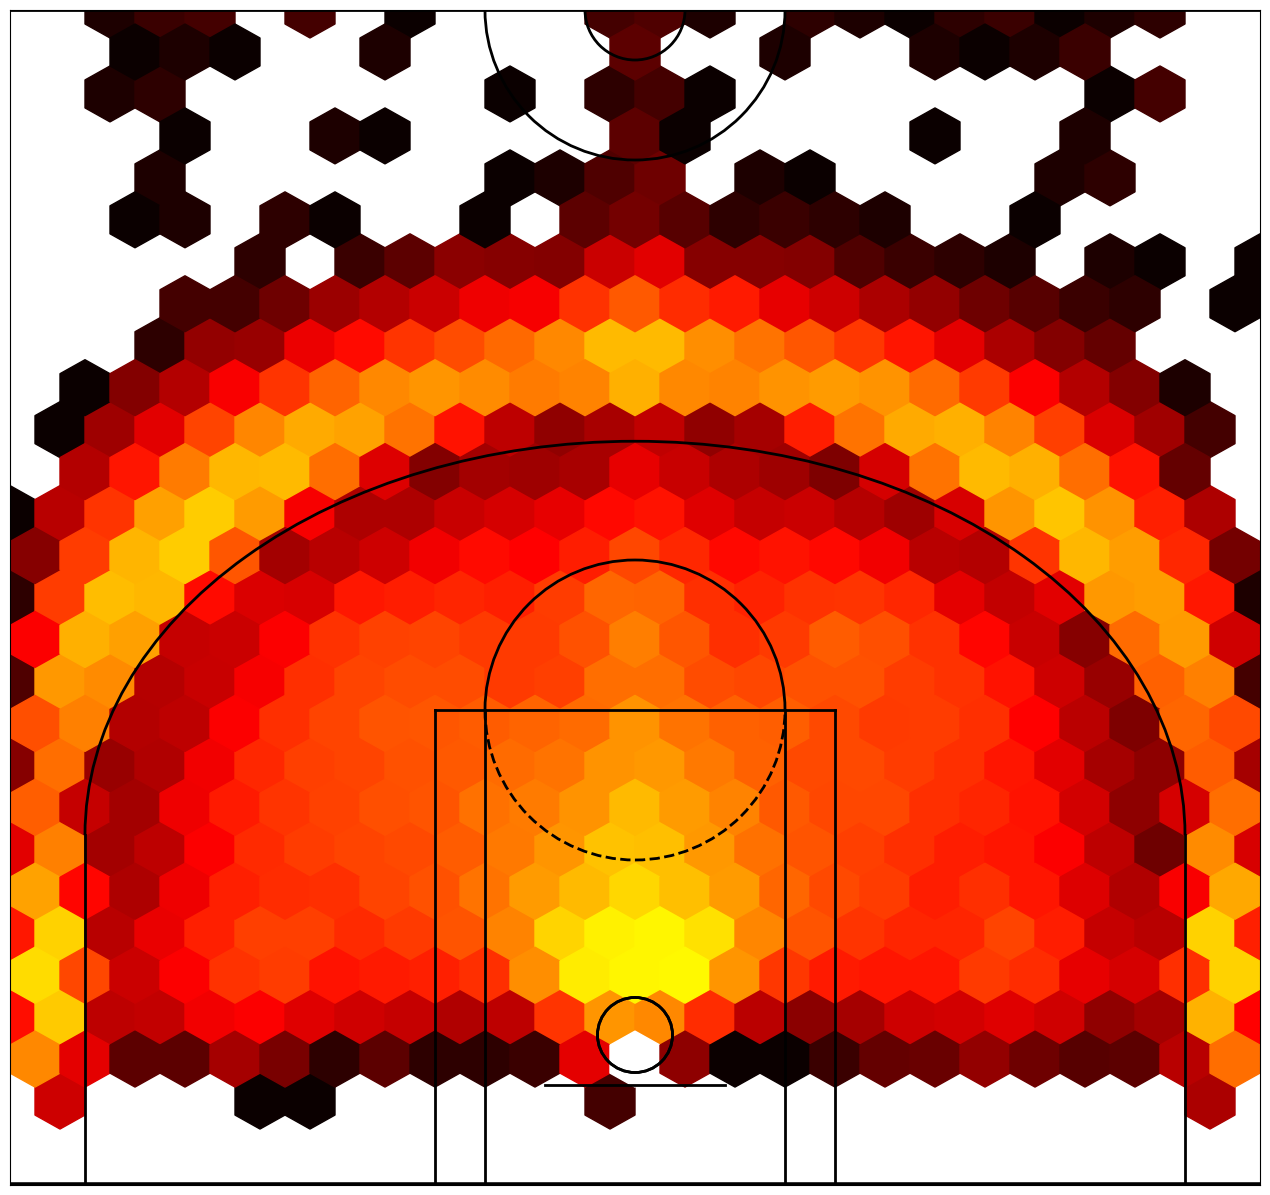

In [ ]:
def shotmap(dataframe, extent=(-250,250, 0, 470), gridsize=25, cmap = 'plasma'):
  fig = plt.figure(figsize =(12.5, 11.75), facecolor='white',edgecolor='black')
  ax = fig.add_axes([0,0,1,1])
  x = dataframe.X_SHOT_COORDINATE*10
  y = dataframe.Y_SHOT_COORDINATE*10 + 60

  hexbin = ax.hexbin(x,y,cmap='hot', bins="log", gridsize=25, mincnt=5, extent=(-250, 250, 0, 470))
  ax = court(ax, 'black')
  #sc = ax.scatter(dataframe.X_SHOT_COORDINATE*10,dataframe.Y_SHOT_COORDINATE*10 +60, c=dataframe.POINTS, cmap='hot')
  plt.show()
  #cbar = plt.colorbar(sc)
  # cbar.set_label('Points')

shotmap(nba_actions)
